<a href="https://colab.research.google.com/github/Fatha27/Projects/blob/main/Clothes_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importing libaries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob



#Data preprocessing

In [ ]:
dm=pd.read_csv("clothes.csv")

In [ ]:
df=dm.drop('Unnamed: 0',axis=1)

In [ ]:
df['Title'].fillna('',inplace=True)

In [ ]:
df['Review Text'].fillna('',inplace=True)

In [ ]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Review']=df['Title']+' '+df['Review Text']

In [ ]:
## Drop rows where 'Review' has an empty string value
df=df[df['Review'] != '']

In [ ]:
df.drop(['Review Text','Title'],inplace=True,axis=1)

In [ ]:
# Drop rows where 'Division Name' has missing values
df = df.dropna(subset=['Division Name'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23472 non-null  int64 
 1   Age                      23472 non-null  int64 
 2   Rating                   23472 non-null  int64 
 3   Recommended IND          23472 non-null  int64 
 4   Positive Feedback Count  23472 non-null  int64 
 5   Division Name            23472 non-null  object
 6   Department Name          23472 non-null  object
 7   Class Name               23472 non-null  object
 8   Review                   23472 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.8+ MB


In [ ]:
df.drop('Positive Feedback Count',axis=1,inplace=True)

In [ ]:
#dropping rows where rating is 5 but its not recommended
df = df.loc[~((df.Rating==5) & (df['Recommended IND']==0))]

In [ ]:
#dropping rows where rating is 1 but its recommended
df=df.loc[~((df.Rating==1) & (df['Recommended IND']==1))]

In [ ]:
df.rename(columns={'Recommended IND': 'Recommended'}, inplace=True)

In [ ]:
df.drop(['Clothing ID','Division Name','Department Name','Class Name'],axis=1,inplace=True)

# Data Visualization


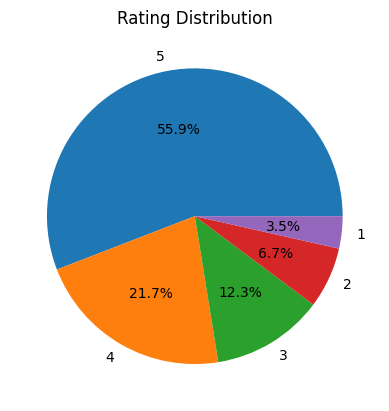

In [ ]:

# Calculate the value counts of each category
Rating_counts = df['Rating'].value_counts()

# Calculate the percentage for each category
Rating_percentages = Rating_counts / len(df) * 100

# Create a pie chart
plt.pie(Rating_percentages, labels=Rating_percentages.index, autopct='%1.1f%%')

# Set plot title
plt.title('Rating Distribution')

# Display the plot
plt.show()


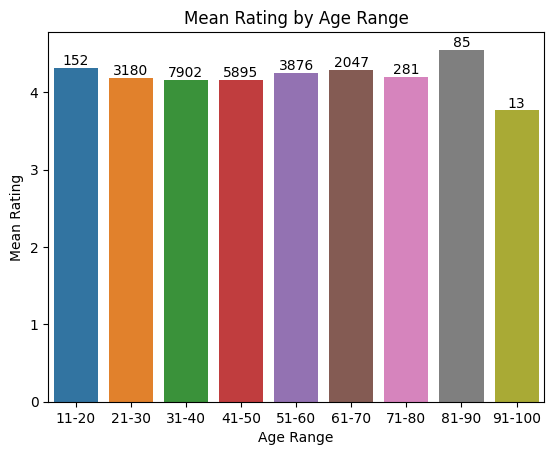

In [ ]:
# Define the age ranges
age_ranges = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize the age column into age ranges
df['Age Range'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=age_ranges)

# Calculate the mean rating and value counts for each age range
mean_ratings = df.groupby('Age Range')['Rating'].mean()
value_counts = df['Age Range'].value_counts()

# Sort the age ranges based on their labels
value_counts = value_counts.reindex(age_ranges)
mean_ratings = mean_ratings.reindex(age_ranges)

# Create a bar plot
sns.barplot(x=mean_ratings.index, y=mean_ratings.values)

# Add data labels to the bars
for i, v in enumerate(mean_ratings.values):
    plt.text(i, v, str(value_counts[i]), ha='center', va='bottom')


# Set plot title and labels
plt.title('Mean Rating by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Mean Rating')


# Display the plot
plt.show()


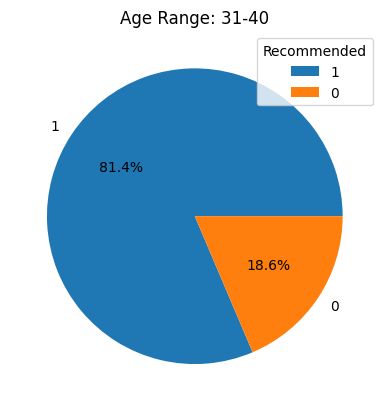

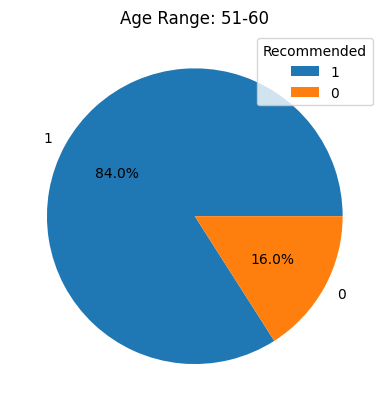

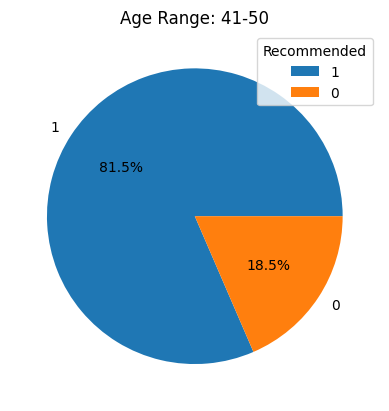

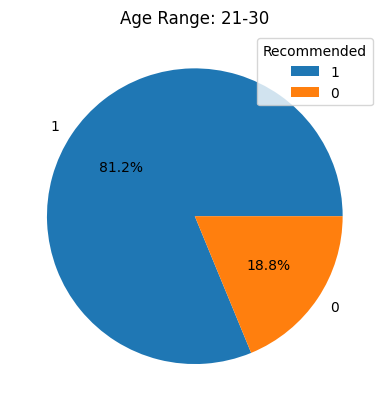

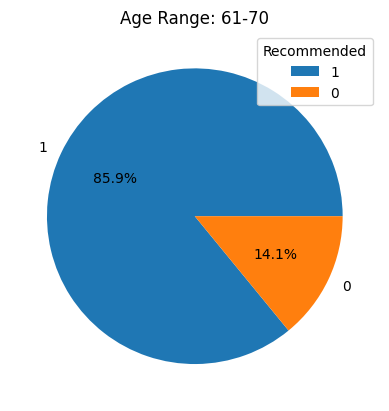

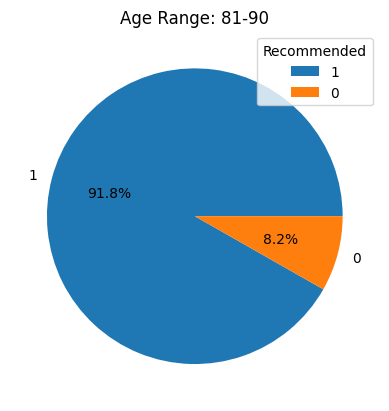

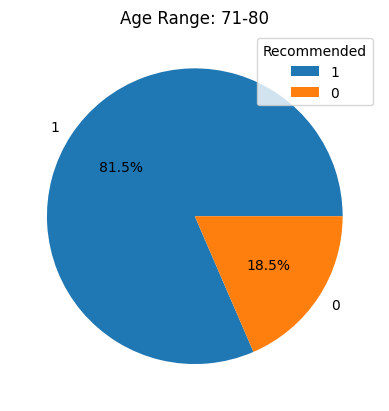

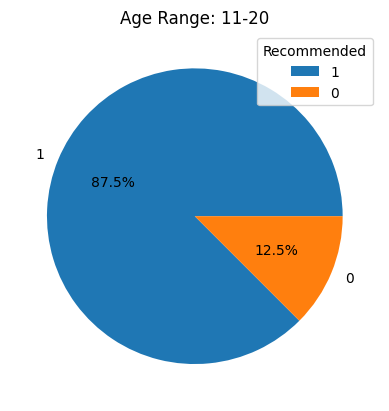

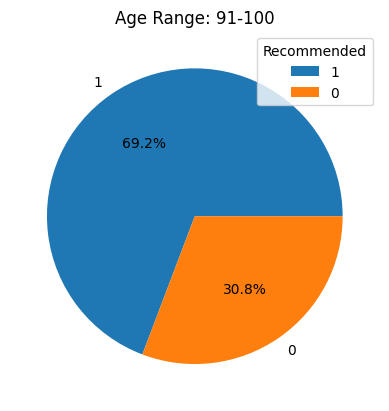

In [ ]:
import matplotlib.pyplot as plt

age_ranges = df['Age Range'].unique()

for age_range in age_ranges:
    age_range_data = df[df['Age Range'] == age_range]
    counts = age_range_data['Recommended'].value_counts()
    percentages = counts / counts.sum() * 100

    plt.figure()
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
    plt.title(f"Age Range: {age_range}")
    plt.legend(title='Recommended', loc='upper right')
    plt.show()



# New section

In [ ]:
# Function to calculate polarity
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply polarity analysis to the "Review" column
df['Polarity'] = df['Review'].apply(get_polarity)

In [ ]:
neg_rev_count=len(df[df['Polarity']<0])
pos_rev_count=len(df[df['Polarity']>0])
print(f"positive reviews:{pos_rev_count}\nnegative reviews::{neg_rev_count}")

positive reviews:21361
negative reviews::1177


In [ ]:
import string

def remove_punctuations(review):
    # Create a translation table to remove punctuations
    translator = str.maketrans('', '', string.punctuation)

    # Remove punctuations using the translation table
    cleaned_review = review.translate(translator)

    return cleaned_review

import pandas as pd


df['Cleaned_Review'] = df['Review'].apply(remove_punctuations)


In [ ]:
df[['Review','Cleaned_Review']]

,Review,Cleaned_Review
0,Absolutely wonderful - silky and sexy and com...,Absolutely wonderful silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happen...,Love this dress its sooo pretty i happened ...
2,Some major design flaws I had such high hopes ...,Some major design flaws I had such high hopes ...
3,"My favorite buy! I love, love, love this jumps...",My favorite buy I love love love this jumpsuit...
4,Flattering shirt This shirt is very flattering...,Flattering shirt This shirt is very flattering...
...,...,...
23481,Great dress for many occasions I was very happ...,Great dress for many occasions I was very happ...
23482,Wish it was made of cotton It reminds me of ma...,Wish it was made of cotton It reminds me of ma...
23483,"Cute, but see through This fit well, but the t...",Cute but see through This fit well but the top...
23484,"Very cute dress, perfect for summer parties an...",Very cute dress perfect for summer parties and...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = stopwords.words('english')
stop.append("i'm")

In [ ]:
import string

def remove_punctuations_from_stopwords(stop):
    translator = str.maketrans('', '', string.punctuation)
    cleaned_stopwords = [word.translate(translator) for word in stop]
    return cleaned_stopwords

cleaned_stop = remove_punctuations_from_stopwords(stop)

print("Original Stopwords:", stop)
print("Cleaned Stopwords:", cleaned_stop)


Original Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

In [ ]:
clothes_list =['dress', 'top','pant','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear','pant']
remove=["most","few","too","very","no","not","don't","won","shouldnt","wasnt","werent","wont","wouldnt","isnt","couldn't","arent","couldnt", "didnt", "doesnt","hadnt","hasnt","havent"]
all_remove=remove+clothes_list

In [ ]:
def remove_words(review):
    words = review.split()  # Split the review into words
    cleaned_words = [word for word in words if word.lower() not in clothes_list]  # Filter out words not in the list
    cleaned_review = ' '.join(cleaned_words)  # Join the cleaned words back into a review
    return cleaned_review

df['CleanedReview'] = df['Cleaned_Review'].apply(remove_words)

In [ ]:
df.head()

,Age,Rating,Recommended,Review,Age Range,Polarity,Cleaned_Review,CleanedReview
0,33,4,1,Absolutely wonderful - silky and sexy and com...,31-40,0.633333,Absolutely wonderful silky and sexy and comf...,Absolutely wonderful silky and sexy and comfor...
1,34,5,1,Love this dress! it's sooo pretty. i happen...,31-40,0.339583,Love this dress its sooo pretty i happened ...,Love this its sooo pretty i happened to find i...
2,60,3,0,Some major design flaws I had such high hopes ...,51-60,0.073209,Some major design flaws I had such high hopes ...,Some major design flaws I had such high hopes ...
3,50,5,1,"My favorite buy! I love, love, love this jumps...",41-50,0.560714,My favorite buy I love love love this jumpsuit...,My favorite buy I love love love this jumpsuit...
4,47,5,1,Flattering shirt This shirt is very flattering...,41-50,0.512891,Flattering shirt This shirt is very flattering...,Flattering This is very flattering to all due ...


In [ ]:
all_stop = [word for word in cleaned_stop if word not in all_remove]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23431 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             23431 non-null  int64   
 1   Rating          23431 non-null  int64   
 2   Recommended     23431 non-null  int64   
 3   Review          23431 non-null  object  
 4   Age Range       23431 non-null  category
 5   Polarity        23431 non-null  float64 
 6   Cleaned_Review  23431 non-null  object  
 7   CleanedReview   23431 non-null  object  
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

for i in range(len(df)):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['CleanedReview'][i])
        review = review.lower()
        review = review.split()
        all_stopwords = stopwords.words('english')
        review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    except KeyError:
        continue


In [ ]:
df.drop('Cleaned_Review',axis=1,inplace=True)


In [ ]:
pos_df=df[df['Recommended']==1]
neg_df=df[df['Recommended']==0]

In [ ]:
pos_words =[]
neg_words = []

for review in pos_df.CleanedReview:
    pos_words.append(review)
pos_words = ' '.join(pos_words)


for review in neg_df.CleanedReview:
    neg_words.append(review)
neg_words = ' '.join(neg_words)


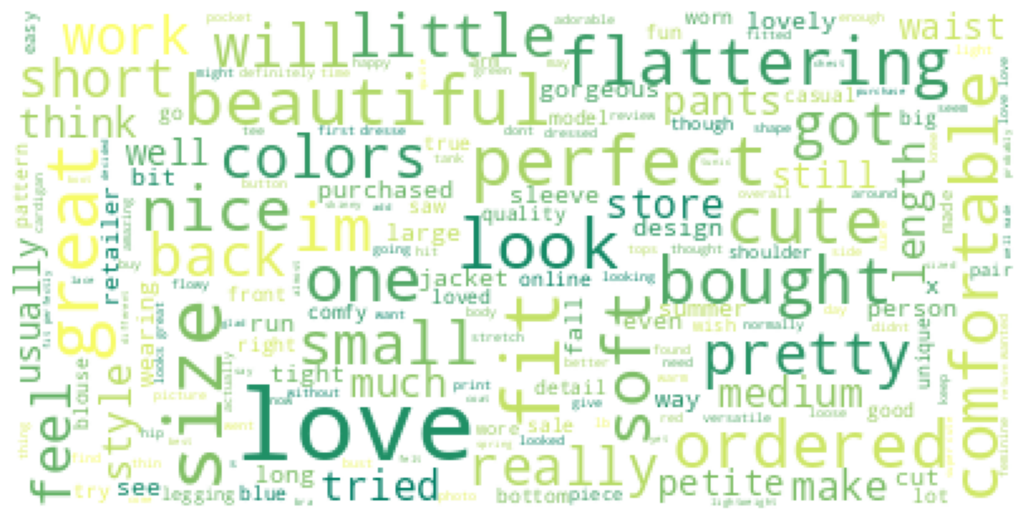

In [ ]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

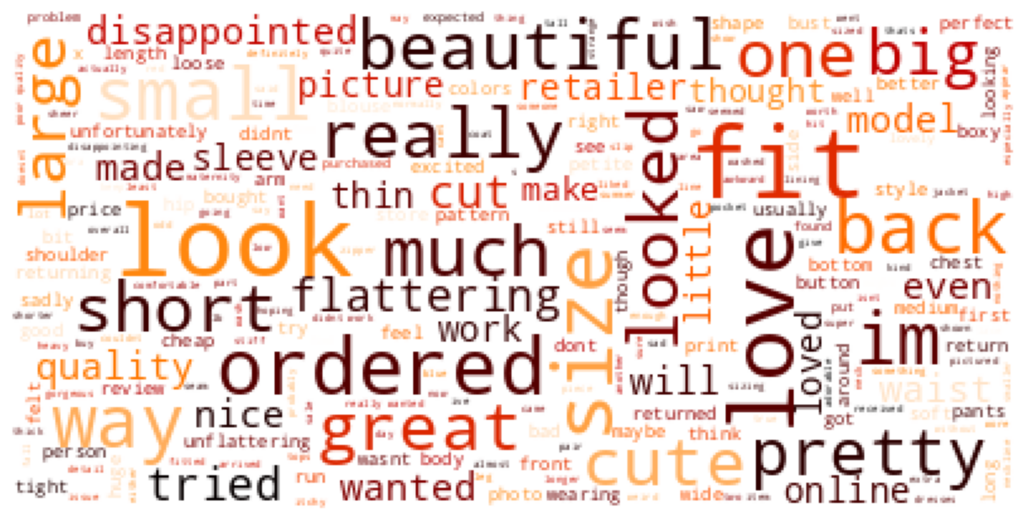

In [ ]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=8000)
p=tv.fit_transform(corpus).toarray()

In [ ]:
dp=pd.DataFrame(p)
df_all=pd.merge(df,dp, left_index=True, right_index=True )
df_all.head()

,Age,Rating,Recommended,Review,Age Range,Polarity,CleanedReview,0,1,2,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,33,4,1,Absolutely wonderful - silky and sexy and com...,31-40,0.633333,Absolutely wonderful silky and sexy and comfor...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,34,5,1,Love this dress! it's sooo pretty. i happen...,31-40,0.339583,Love this its sooo pretty i happened to find i...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,60,3,0,Some major design flaws I had such high hopes ...,51-60,0.073209,Some major design flaws I had such high hopes ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.131751,0.121159,0.0,0.0
3,50,5,1,"My favorite buy! I love, love, love this jumps...",41-50,0.560714,My favorite buy I love love love this jumpsuit...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,47,5,1,Flattering shirt This shirt is very flattering...,41-50,0.512891,Flattering This is very flattering to all due ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
X = df_all.drop(['Recommended','Rating','Review','CleanedReview','Age Range'],axis=1)
y = df_all.Recommended



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_age=scaler.fit_transform(X_train['Age'].values.reshape(-1,1))

In [ ]:
X_train['Age']=scaled_age

In [ ]:
X_train

,Age,Polarity,0,1,2,3,4,5,6,7,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
10262,0.432099,0.151972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8319,0.308642,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20663,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3501,0.518519,0.252381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20891,0.518519,0.308333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.456790,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,0.086420,0.295114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,0.185185,0.302362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,0.543210,0.275000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaled_agetest=scaler.fit_transform(X_test['Age'].values.reshape(-1,1))

In [ ]:
X_test['Age']=scaled_agetest

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 462  362]
 [  96 3767]]


0.9022829101770855

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_predr = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predr)
print(cm)
accuracy_score(y_test, y_predr)

[[ 353  471]
 [ 123 3740]]


0.8732664817580542

In [ ]:
X_test.head()

,Age,Polarity,0,1,2,3,4,5,6,7,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
4821,0.4500,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13475,0.1375,0.073611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12084,0.4250,0.184615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2049,0.2750,0.158135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.3375,0.201099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
z=df_all.Rating

In [ ]:
z.head()

0    4
1    5
2    3
3    5
4    5
Name: Rating, dtype: int64

In [ ]:
X['Age']=scaler.fit_transform(X['Age'].values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.20, random_state = 0)

In [ ]:
X_train.columns = X.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

In [ ]:
rf.fit(X_train, z_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
z_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
mean_absolute_error(z_test,z_pred)

0.5927032216769789

In [ ]:
r2_score(z_test,z_pred)

0.07666293932367818

In [ ]:
mean_absolute_percentage_error(z_test,z_pred)

0.24458075528056325

In [ ]:
import pandas as pd

# Assuming 'y_test' contains the actual test values and 'y_pred' contains the predicted values
comparison_df = pd.DataFrame({'Actual': z_test, 'Predicted': z_pred})

# Display the comparison DataFrame
comparison_df
